# Analysis Noun Attitude in R

This code is main edited by Enze Wang

Fixed by Yicen Liu and Hua Tong

# Attention

Please put four .csv file in data folder and put this code in main folder instead of code folder.

This code want to do test for business on whether change or fix their service or food to increase star rating. 



In [1]:
if (!require(ggplot2)){
  install.packages("ggplot2")
}
if (!require(DAAG)){
  install.packages("DAAG")
}
if (!require(glmnet)){
  install.packages("glmnet")
}
if (!require(grid)){
  install.packages("grid")
}
if (!require(gridExtra)){
  install.packages("gridExtra")
}
if (!require(MASS)){
  install.packages("MASS")
}
if (!require(car)){
  install.packages("car")
}
if (!require(corrplot)){
  install.packages("corrplot")
}
if (!require(leaps)){
  install.packages("leaps")
}
if (!require(caret)){
  install.packages("caret")
}
if (!require(psych)){
  install.packages("psych")
}
if (!require(stats)){
  install.packages("stats")
}
if (!require(broom)){
  install.packages("broom")
}
if (!require(gbm)){
  install.packages("gbm")
}
if (!require(randomForest)){
  install.packages("randomForest")
}
if (!require(olsrr)){
  install.packages("olsrr")
}
if (!require(regclass)){
  install.packages("regclass")
}
if (!require(pROC)){
  install.packages("pROC")
}

Loading required package: ggplot2

Loading required package: DAAG

Loading required package: lattice

Loading required package: glmnet

Loading required package: Matrix

Loaded glmnet 4.0-2

Loading required package: grid

Loading required package: gridExtra

Loading required package: MASS


Attaching package: ‘MASS’


The following object is masked from ‘package:DAAG’:

    hills


Loading required package: car

Loading required package: carData


Attaching package: ‘car’


The following object is masked from ‘package:DAAG’:

    vif


Loading required package: corrplot

corrplot 0.84 loaded

Loading required package: leaps

Loading required package: caret

Loading required package: psych


Attaching package: ‘psych’


The following object is masked from ‘package:car’:

    logit


The following objects are masked from ‘package:ggplot2’:

    %+%, alpha


Loading required package: broom

Loading required package: gbm

Loaded gbm 2.1.8

Loading required package: randomForest

randomFor

In [2]:
Word_Review_Matrix=read.csv("data/Word_Review_Matrix.csv")
Review=read.csv("data/pizza_review.csv")
Noun_Variables_Important=read.csv("data/Noun_Variables_Important.csv")

In [3]:
Word_Review_Matrix

X,review_id,business_id,stars,pizza,food,cheese,sauce,service,salad,⋯,cranberry,linguini,fennel,fryer,pea,coconut,mixture,peach,manicotti,romaine
<int>,<chr>,<chr>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
0,hfXVxrlD6fr1kXfz6sR13Q,J9f-9Prw2YVM-fiZqv2fmQ,2,NA,NA,NA,NA,1,NA,⋯,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
1,EDQpLLFiAxeSxWI5ipwzBQ,lpel3pRFAzlow7u2TJMz4Q,4,1,NA,NA,NA,NA,NA,⋯,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
2,RWmT90rP7wYo57dG1cyvww,Zja7ykq3icDzkN20XX6j1w,5,1,NA,NA,NA,NA,NA,⋯,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
3,0jduztItUhOh3FzKGjMxZQ,hr0vxeTzlHx6fTpSSmu2AA,5,NA,1,NA,NA,NA,NA,⋯,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
4,sxfmzhMvZ8LlI1x4fhNjKg,F4kjKxXXyn3e-BYVb1mWcg,4,1,1,NA,NA,NA,NA,⋯,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
5,Mp7qXWexqoSqKbNh7dYhJg,J9f-9Prw2YVM-fiZqv2fmQ,5,NA,NA,NA,NA,NA,NA,⋯,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
6,5e_JUyKVFpYxl9qHp1MG1Q,7xHbnGo4MXFkBm6gYSu_xg,2,1,NA,NA,NA,NA,NA,⋯,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
7,D2oYk9ipsvsYP_ls0aL9kg,eU_713ec6fTGNO4BegRaww,4,NA,0,NA,NA,NA,NA,⋯,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
8,CKHk7l_VriSEqPbG1PSLTw,epWC7CGRbNHkXM7G2ulYzQ,3,1,NA,NA,NA,NA,0,⋯,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA


In [4]:
Word_Data=Word_Review_Matrix[,-c(1,2,3)]
Word_Data

stars,pizza,food,cheese,sauce,service,salad,restaurant,crust,chicken,⋯,cranberry,linguini,fennel,fryer,pea,coconut,mixture,peach,manicotti,romaine
<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
2,NA,NA,NA,NA,1,NA,NA,NA,NA,⋯,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
4,1,NA,NA,NA,NA,NA,NA,NA,NA,⋯,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
5,1,NA,NA,NA,NA,NA,NA,NA,NA,⋯,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
5,NA,1,NA,NA,NA,NA,1,NA,NA,⋯,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
4,1,1,NA,NA,NA,NA,NA,NA,NA,⋯,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
5,NA,NA,NA,NA,NA,NA,NA,NA,NA,⋯,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
2,1,NA,NA,NA,NA,NA,NA,NA,NA,⋯,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
4,NA,0,NA,NA,NA,NA,NA,NA,NA,⋯,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
3,1,NA,NA,NA,NA,0,NA,NA,NA,⋯,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA


# ANOVA

First we use ANOVA, our H0: the mean star rating of positive, neutral and negative reviews is the same. our H1: the mean is not the same. 

# Assumption Check

In [5]:
Word_Data[which(Word_Data[,2]==1),]

,stars,pizza,food,cheese,sauce,service,salad,restaurant,crust,chicken,⋯,cranberry,linguini,fennel,fryer,pea,coconut,mixture,peach,manicotti,romaine
,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
2,4,1,NA,NA,NA,NA,NA,NA,NA,NA,⋯,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
3,5,1,NA,NA,NA,NA,NA,NA,NA,NA,⋯,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
5,4,1,1,NA,NA,NA,NA,NA,NA,NA,⋯,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
7,2,1,NA,NA,NA,NA,NA,NA,NA,NA,⋯,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
9,3,1,NA,NA,NA,NA,0,NA,NA,NA,⋯,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
12,2,1,NA,NA,NA,NA,NA,NA,NA,NA,⋯,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
13,5,1,NA,NA,NA,NA,NA,NA,NA,NA,⋯,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
14,5,1,1,0,1,NA,NA,NA,NA,1,⋯,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
15,5,1,1,NA,NA,NA,NA,NA,NA,NA,⋯,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA


Saving 7 x 7 in image



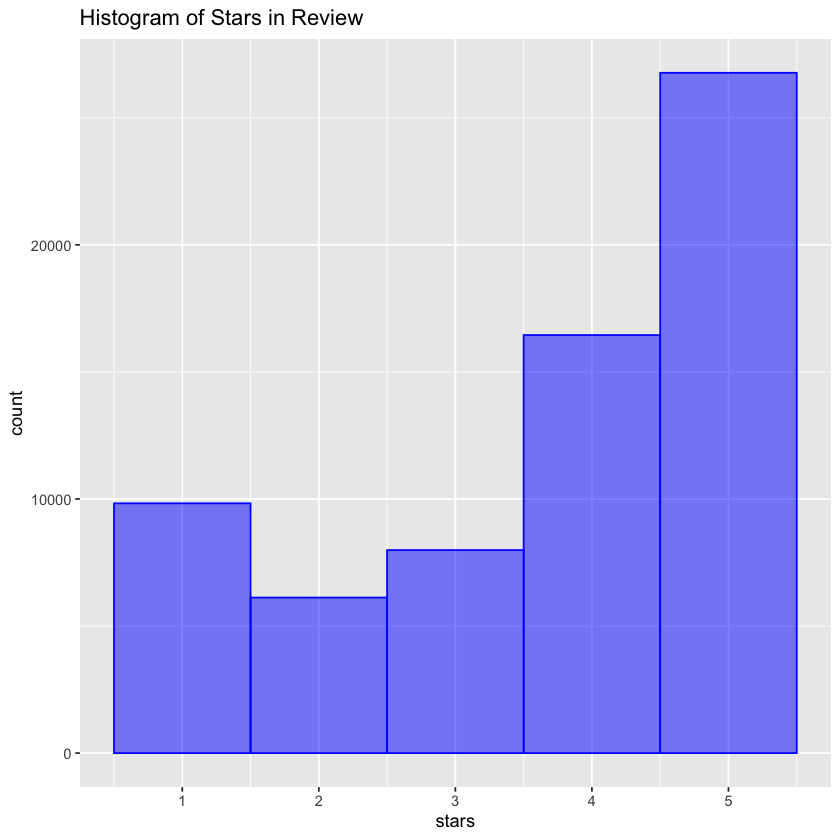

Saving 7 x 7 in image



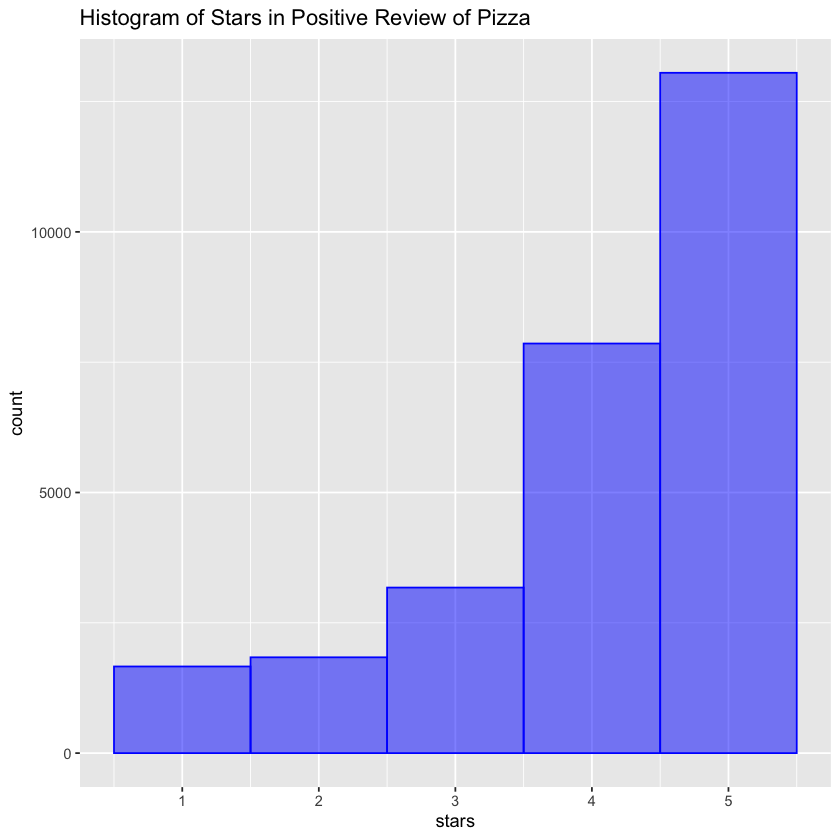

Saving 7 x 7 in image



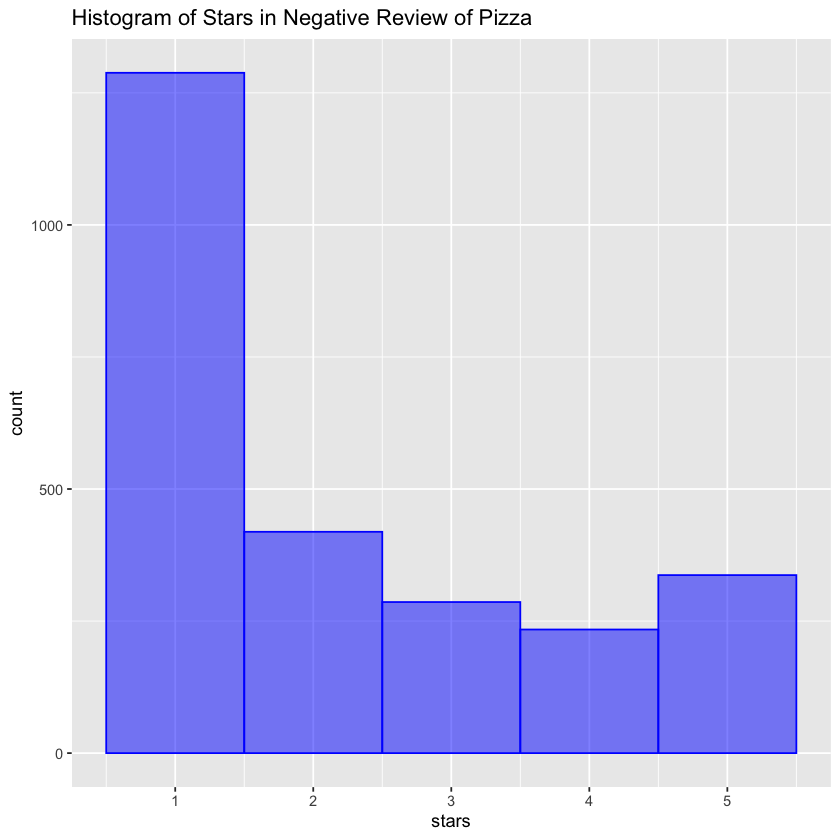

Saving 7 x 7 in image



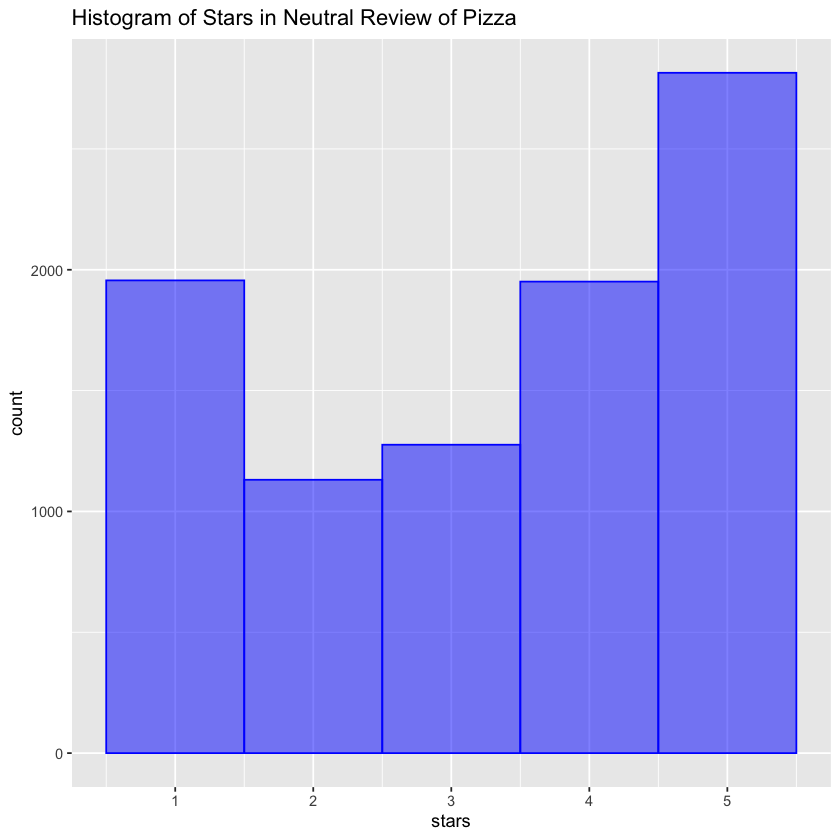

In [6]:
g1=ggplot(Word_Data["stars"], aes(x=stars))+geom_histogram(color='blue',fill='blue',alpha=0.5,binwidth=1)+ggtitle("Histogram of Stars in Review")
g1
ggsave("figure/Histogram_of_Stars_in_Review.jpeg",g1)
g2=ggplot(Word_Data[which(Word_Data[,2]==1),], aes(x=stars))+geom_histogram(color='blue',fill='blue',alpha=0.5,binwidth=1)+ggtitle("Histogram of Stars in Positive Review of Pizza")
g2
ggsave("figure/Histogram_of_Stars_in_Positive_Review_of_Pizza.jpeg",g2)
g3=ggplot(Word_Data[which(Word_Data[,2]==-1),], aes(x=stars))+geom_histogram(color='blue',fill='blue',alpha=0.5,binwidth=1)+ggtitle("Histogram of Stars in Negative Review of Pizza")
g3
ggsave("figure/Histogram_of_Stars_in_Negative_Review_of_Pizza.jpeg",g3)
g4=ggplot(Word_Data[which(Word_Data[,2]==0),], aes(x=stars))+geom_histogram(color='blue',fill='blue',alpha=0.5,binwidth=1)+ggtitle("Histogram of Stars in Neutral Review of Pizza")
g4
ggsave("figure/Histogram_of_Stars_in_Neutral_Review_of_Pizza.jpeg",g4)


As you can see. The star distribution is obviously not normal. There may be problem for ANOVA test. But our sample is enough. 

We hold that all review is independent

In [7]:
Word=c()
ANOVA_P_Value=c()
Mean_Difference_P_C=c()
Mean_Difference_C_N=c()
for(i in 2:(length(Word_Data))){
    Rating_Positive=Word_Data[which(Word_Data[,i]==1),]$stars
    Rating_Negative=Word_Data[which(Word_Data[,i]==-1),]$stars
    Rating_Neutral=Word_Data[which(Word_Data[,i]==0),]$stars
    if(length(Rating_Positive)>30 & length(Rating_Negative)>30 & length(Rating_Neutral)>30){
        ANOVA_P_Value=c(ANOVA_P_Value,anova(lm(as.numeric(Word_Data[which(Word_Data[,i]!='NA'),]$stars)~as.factor(Word_Data[which(Word_Data[,i]!='NA'),i])))$"Pr(>F)"[1])
        Mean_Difference_P_C=c(Mean_Difference_P_C,mean(Rating_Positive)-mean(Rating_Neutral))
        Mean_Difference_C_N=c(Mean_Difference_C_N,mean(Rating_Neutral)-mean(Rating_Negative))
        Word=c(Word,colnames(Word_Data)[i])
        
    }
}

In [8]:
ANOVA_Results=cbind(Word,ANOVA_P_Value,Mean_Difference_P_C,Mean_Difference_C_N)

In [9]:
ANOVA_Results

Word,ANOVA_P_Value,Mean_Difference_P_C,Mean_Difference_C_N
pizza,0,0.765992713397536,1.09197767516353
food,0,1.02062366864991,1.04133422240925
cheese,2.60616269741317e-181,0.546956365053799,0.764313075887773
sauce,4.43690085630855e-218,0.619600121983761,0.716550894786189
service,0,1.05767434120875,1.338665851303
salad,1.12515605529469e-173,0.561027520661523,1.08705555638354
restaurant,2.31906369109891e-267,0.731899996584583,1.01537665896955
crust,2.28425940877732e-161,0.558714142037318,0.674698532932828
chicken,1.49845265424075e-120,0.526699572839434,0.955284926571184
beer,4.90802786696344e-66,0.398951009150213,0.720744810744811


Check for "cheese", the three star review are:

In [10]:
Rating_Positive=Word_Data[which(Word_Data[,4]==1),]$stars
Rating_Negative=Word_Data[which(Word_Data[,4]==-1),]$stars
Rating_Neutral=Word_Data[which(Word_Data[,4]==0),]$stars

In [11]:
mean(Rating_Positive)-mean(Rating_Neutral)

[1] 0.5469564

In [12]:
mean(Rating_Neutral)-mean(Rating_Negative)

[1] 0.7643131

In [13]:
Factor=as.factor(c(rep("Pos",length(Rating_Positive)),rep("Neg",length(Rating_Negative)),rep("Neu",length(Rating_Neutral))))

In [14]:
anova(lm(c(Rating_Positive,Rating_Negative,Rating_Neutral)~Factor))

,Df,Sum Sq,Mean Sq,F value,Pr(>F)
,<int>,<dbl>,<dbl>,<dbl>,<dbl>
Factor,2,1458.166,729.083014,431.6671,2.606163e-181
Residuals,11179,18881.261,1.688994,NA,NA


No problems. 

Our results show that for most of words, there are significant difference among the three kinds of review toward most of words except:

In [15]:
ANOVA_Results[as.numeric(ANOVA_Results[,2])>0.05,]

Word,ANOVA_P_Value,Mean_Difference_P_C,Mean_Difference_C_N


The difference is significant for every words.

And most of the difference between star rating of positive with neutral and neutral with negative is larger than 0. Which means that postive review usually have significant high star rating. 

In [16]:
ANOVA_Results[as.numeric(ANOVA_Results[,3])<0 | as.numeric(ANOVA_Results[,4])<0,]

Word          ANOVA_P_Value    Mean_Difference_P_C 
             "cooking" "0.000246775328416975"    "0.533940887640664" 
   Mean_Difference_C_N 
 "-0.0314174557733242"

But the difference between positive and negative is always larger than 0. Therefore we will pay attention to the difference between positive and negative reviews. 

# T Test 

Compared with linear regression to test whether a noun exist or not can increase star rating. The data here may not be good to linear regression. Because there are four kinds of input. 1, -1, 0 and np.nan. It is also take neural review as no review. So here we only use unpaired T test

As I mention before, the distribution of review star rating is not normality. Although Welch test is robust to non normality, we will choose the words with enough reviews to do our test. 

T test hypothesis:

H0: the mean star rating of review with positive attitude toward some noun is larger than that with negative attitude. 

H1: the mean of positive is smaller than negative.


We only consider the word whose review number is larger than 30. 

In [17]:
Word=c()
T_Test_P_Value=c()
Wilcoxon_Test_P_Value=c()
Mean_Difference=c()
for(i in 2:(length(Word_Data))){
    Rating_Positive=Word_Data[which(Word_Data[,i]==1),]$stars
    Rating_Negative=Word_Data[which(Word_Data[,i]==-1),]$stars
    if(length(Rating_Positive)>30 & length(Rating_Negative)>30){
        T_Test_P_Value=c(T_Test_P_Value,t.test(Rating_Positive,Rating_Negative,alternative = c("greater"),mu = 0, paired = FALSE, var.equal = FALSE, conf.level = 0.95)$p.value)
        Wilcoxon_Test_P_Value=c(Wilcoxon_Test_P_Value,wilcox.test(Rating_Positive,Rating_Negative, alternative = "greater",mu = 0, paired = FALSE, conf.level = 0.95)$p.value)
        Mean_Difference=c(Mean_Difference,mean(Rating_Positive)-mean(Rating_Negative))
        Word=c(Word,colnames(Word_Data)[i])
        
    }
}

In [18]:
T_Sig=T_Test_P_Value<0.05
Wilcoxon_Sig=Wilcoxon_Test_P_Value<0.05
Final_Results=cbind(Word,T_Test_P_Value,T_Sig,Mean_Difference)
Final_Results

Word,T_Test_P_Value,T_Sig,Mean_Difference
pizza,0,TRUE,1.85797038856107
food,0,TRUE,2.06195789105916
cheese,1.17424007740695e-81,TRUE,1.31126944094157
sauce,5.22210301380559e-89,TRUE,1.33615101676995
service,0,TRUE,2.39634019251175
salad,1.55364100608646e-89,TRUE,1.64808307704507
restaurant,7.44969147426798e-160,TRUE,1.74727665555414
crust,3.92033441221748e-48,TRUE,1.23341267497015
chicken,1.82635097297794e-57,TRUE,1.48198449941062
beer,5.49131050684922e-32,TRUE,1.11969581989502


In [19]:
Final_Results=Final_Results[which(Final_Results[,3]==TRUE),]

In [20]:
Positive=Final_Results[,4]>0
which(Positive==FALSE)

integer(0)

In [21]:
Final_Results

Word,T_Test_P_Value,T_Sig,Mean_Difference
pizza,0,TRUE,1.85797038856107
food,0,TRUE,2.06195789105916
cheese,1.17424007740695e-81,TRUE,1.31126944094157
sauce,5.22210301380559e-89,TRUE,1.33615101676995
service,0,TRUE,2.39634019251175
salad,1.55364100608646e-89,TRUE,1.64808307704507
restaurant,7.44969147426798e-160,TRUE,1.74727665555414
crust,3.92033441221748e-48,TRUE,1.23341267497015
chicken,1.82635097297794e-57,TRUE,1.48198449941062
beer,5.49131050684922e-32,TRUE,1.11969581989502


In [22]:
dim(Final_Results)

[1] 94  4

Therefore, our function gives a list on important business or food. Where there are significant difference between the star rating of positve reviews and negative reviews of them. And for all words, the mean of positive reviews star rating is larger than negative one. 

In [23]:
write.csv(Final_Results,"data/Results_Analysis_Noun_Attitude.csv")